In [ ]:
# for loops in simulation studies
# initialization
n <- 100
n_sim <- 1000
mu <- 5
sigma <- 2
count <- rep(NA, n_sim)

# repitition
set.seed(0)
for (i in 1:n_sim) {
    x <- rnorm(n, mean = mu, sd = sigma)
    count[i] <- (abs(mean(x) - mu) <= qnorm(0.975) * sigma / sqrt(n))
}

mean(count)

[1] 0.952

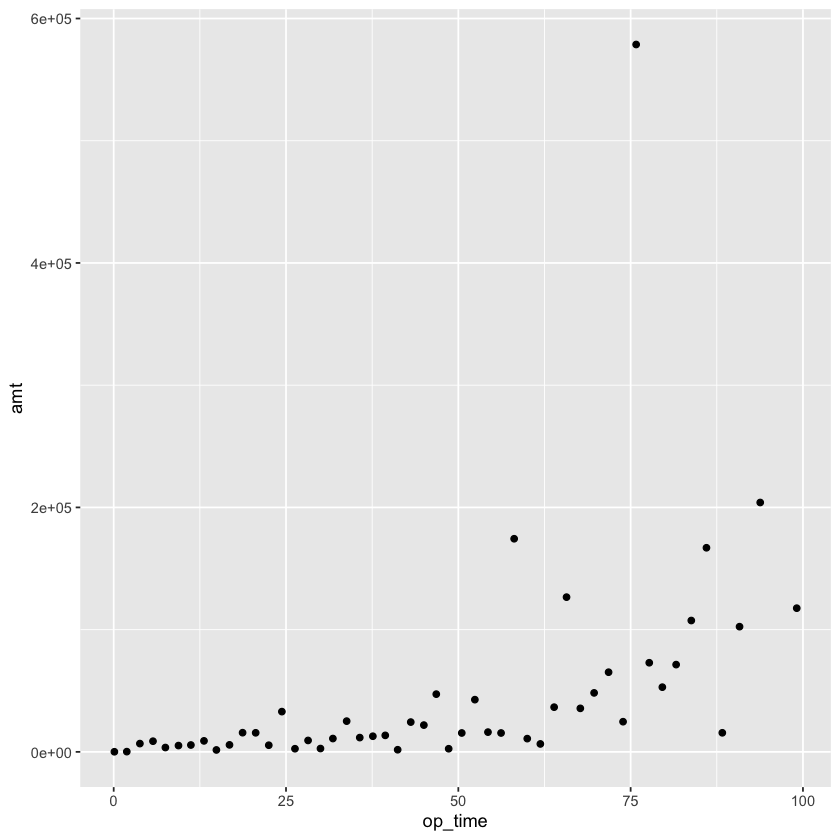

In [ ]:
# Data Exploration and Visualization
library(ggplot2)
persinj <- read.csv("persinj.csv")
persinj50 <- persinj[seq(1, nrow(persinj), length = 50), ]

ggplot(data = persinj50, mapping = aes(x = op_time, y = amt)) + 
    geom_point()

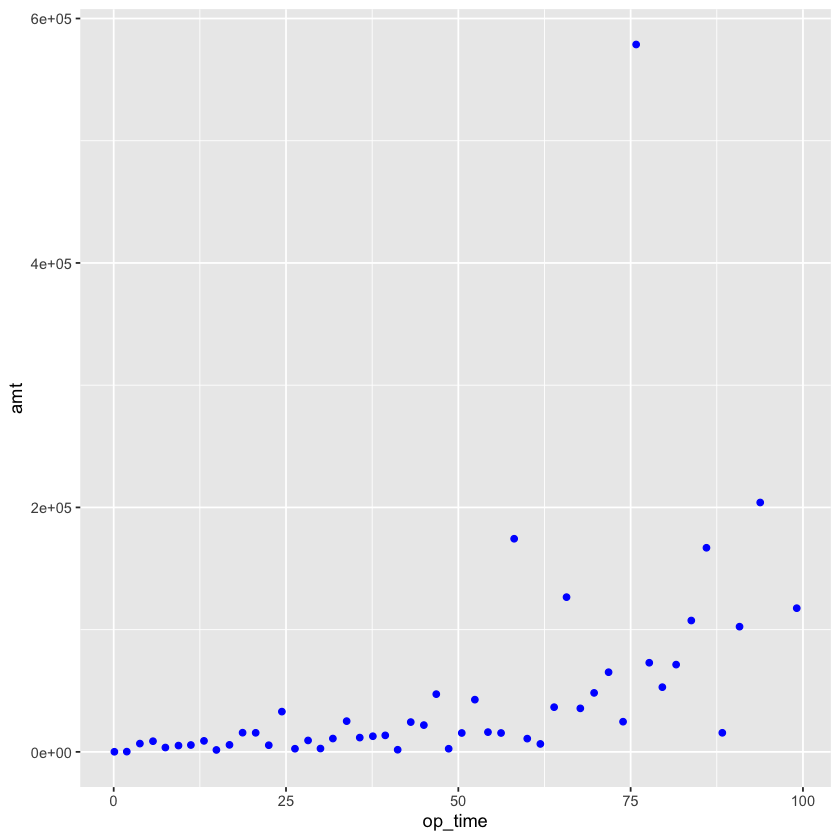

In [ ]:
# coloring
# reserve aes() for mapping between aesthetics and variables,
# rather than basic visual customizations
ggplot(persinj50, aes(x = op_time, y = amt)) +
    geom_point(color = "blue")

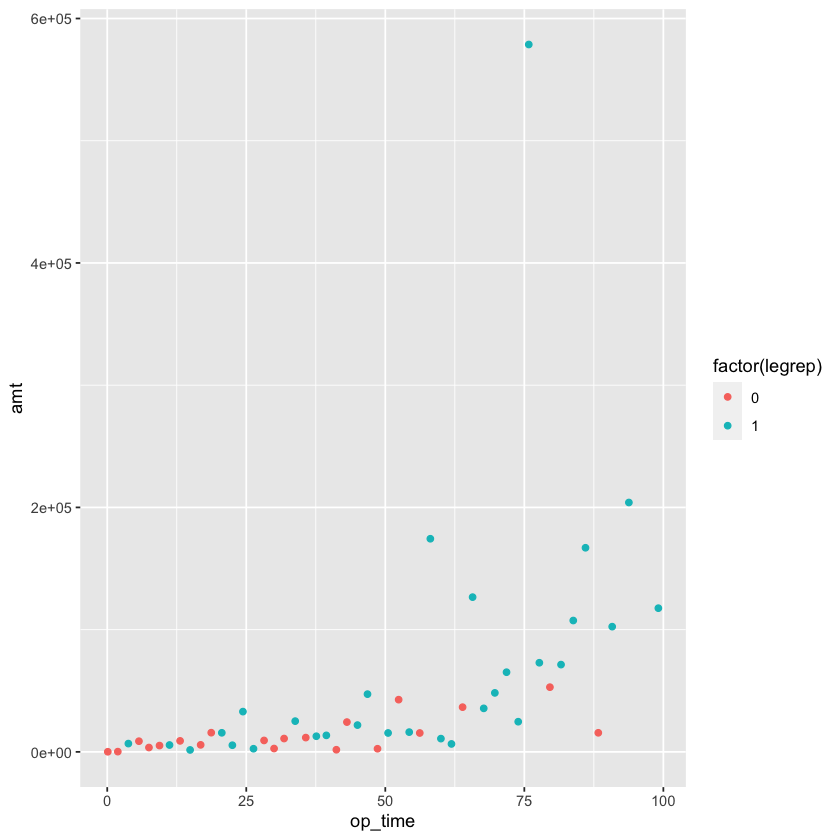

In [ ]:
# visual mapping example
# we convert legrep to a factor first so that it is treated as a binary
ggplot(persinj50, aes(x = op_time, y = amt, color = factor(legrep))) + 
    geom_point()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


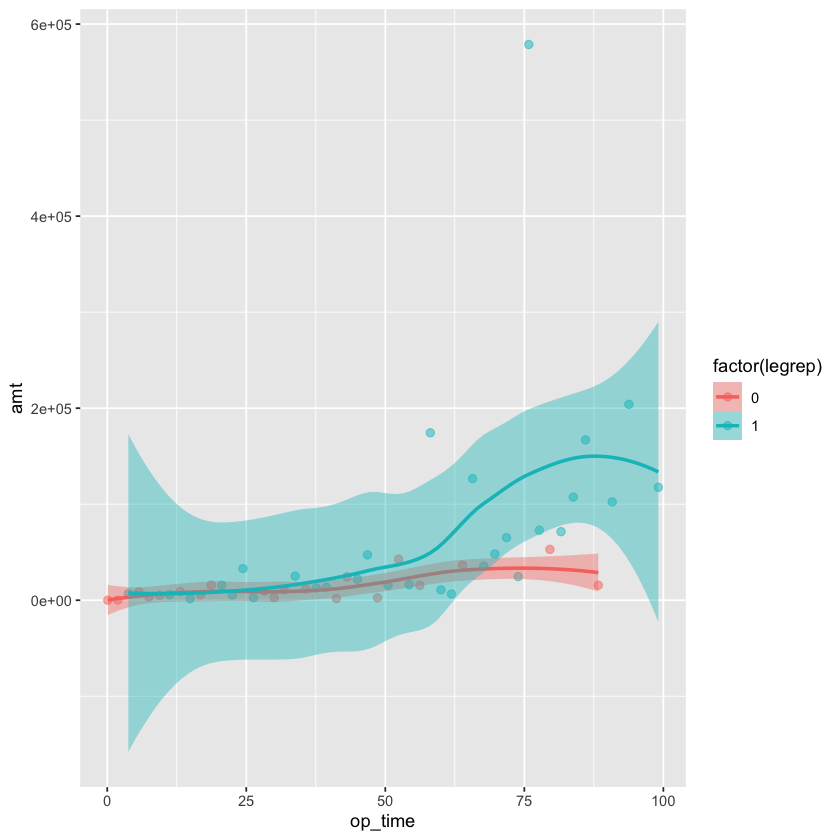

In [ ]:
# smoothing line and error bands
ggplot(persinj50, aes(x = op_time, y = amt,
                        color = factor(legrep), fill = factor(legrep))) + 
    geom_point(size = 2, alpha = 0.5) + 
    geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


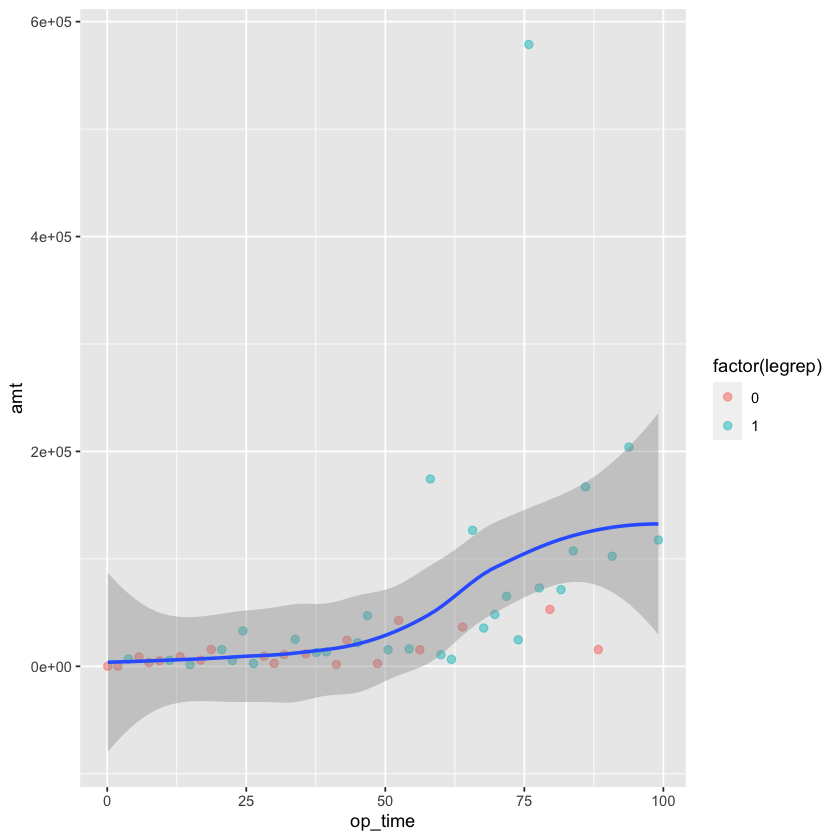

In [ ]:
# to have a single smoothed curve, not divided by aesthetic divisions:
# assign separate aes() mappings
ggplot(persinj50, aes(x = op_time, y = amt)) + 
    geom_point(aes(color = factor(legrep)), size = 2, alpha = 0.5) + 
    geom_smooth()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


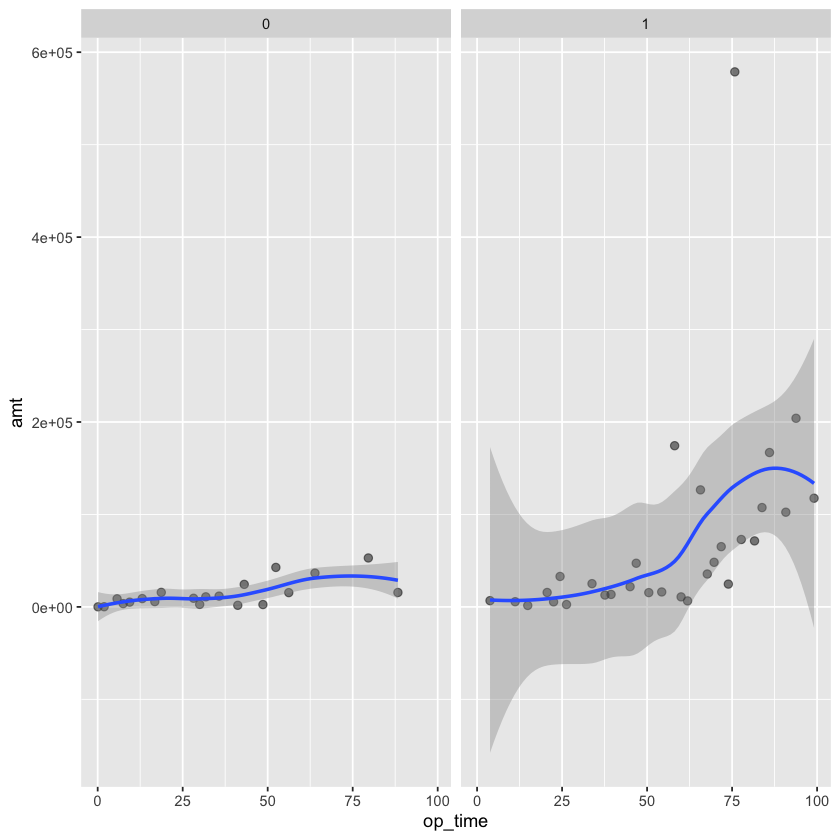

In [ ]:
# faceting - another way to group data
ggplot(persinj50, aes(x = op_time, y = amt)) + 
    geom_point(size = 2, alpha = 0.5) + 
    geom_smooth() +
    facet_wrap(~ legrep)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


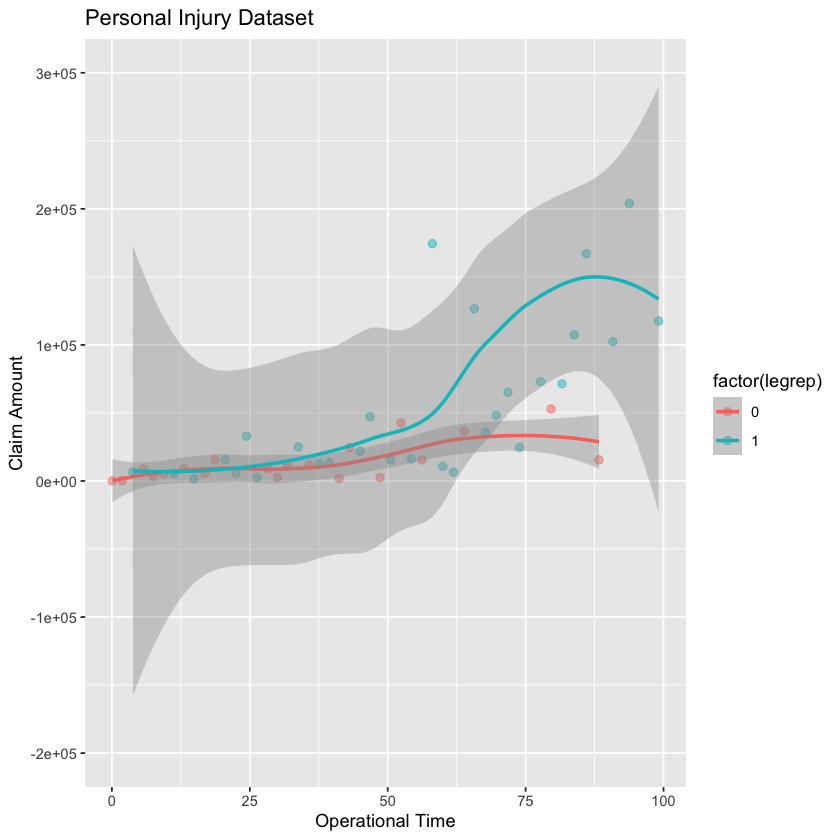

In [ ]:
ggplot(persinj50, aes(x = op_time, y = amt, color = factor(legrep), fille = factor(legrep))) + 
    geom_point(size = 2, alpha = 0.5) +
    geom_smooth() + 
    labs(title = "Personal Injury Dataset",
                    x = "Operational Time",
                    y = "Claim Amount") + 
    coord_cartesian(ylim = c(-200000, 300000))  # limits y axis display range

In [ ]:
# Descriptive Statistics
# summary() can be used on a variable

# reload data
persinj <- read.csv("persinj.csv")

print("Summary of persinj amt")
summary(persinj$amt)

# create 2 subsets for legal rep and lack thereof
persinj.0 <- persinj[persinj$legrep == 0, ]
persinj.1 <- persinj[persinj$legrep == 1, ]

print("Summary of persinj.0 and .1")
summary(persinj.0$amt)
summary(persinj.1$amt)

# standard deviations
sd(persinj.0$amt)
sd(persinj.1$amt)

[1] "Summary of persinj amt"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     10    6297   13854   38367   35123 4485797 

[1] "Summary of persinj.0 and .1"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     10    4061   11164   32398   29641 2798362 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     20    7305   15309   41775   38761 4485797 

[1] 77820.33

[1] 97541.38

Warning message:
“Removed 1825 rows containing non-finite values (`stat_bin()`).”


Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1825 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1825 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1825 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


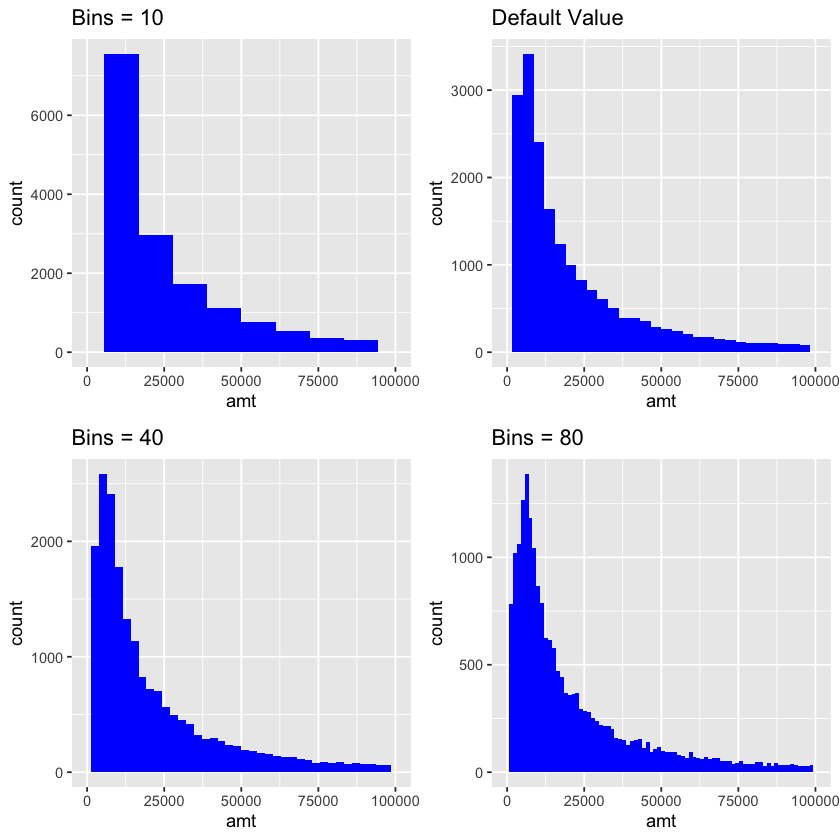

In [ ]:
# organizing histograms

p1 <- ggplot(persinj, aes(x = amt)) + 
    geom_histogram(bins = 10, fill = "blue") +
    xlim(0, 100000) + 
    ggtitle("Bins = 10")

p2 <- ggplot(persinj, aes(x = amt)) + 
    geom_histogram(fill = "blue") +
    xlim(0, 100000) + 
    ggtitle("Default Value")

p3 <- ggplot(persinj, aes(x = amt)) + 
    geom_histogram(bins = 40, fill = "blue") +
    xlim(0, 100000) + 
    ggtitle("Bins = 40")

p4 <- ggplot(persinj, aes(x = amt)) + 
    geom_histogram(bins = 80, fill = "blue") +
    xlim(0, 100000) + 
    ggtitle("Bins = 80")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, ncol = 2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


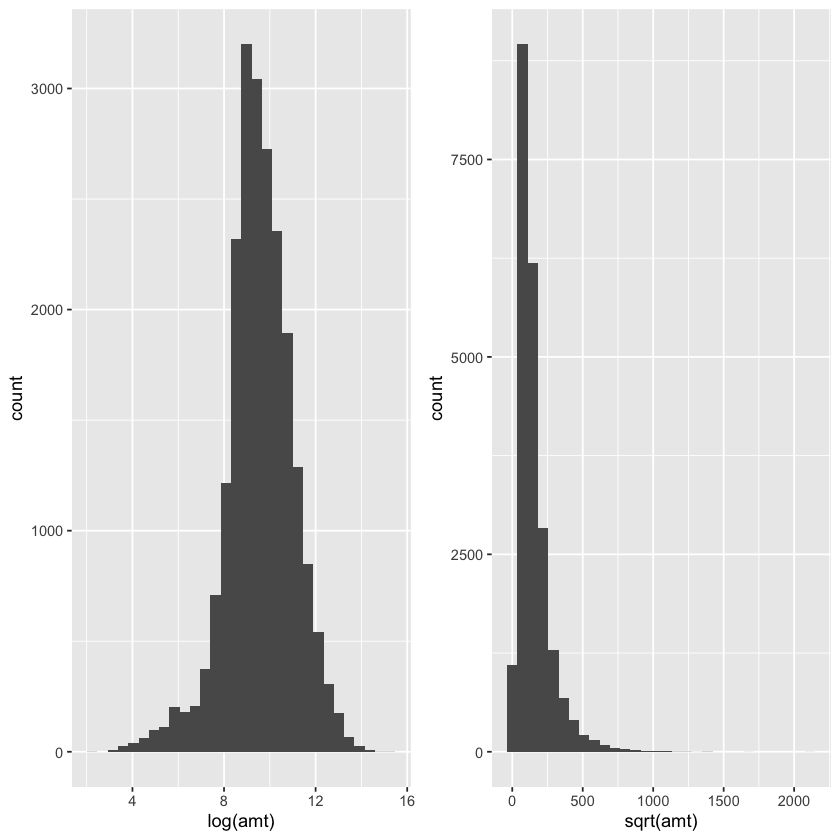

In [ ]:
# log and sqrt transformations

p1 <- ggplot(persinj, aes(x = log(amt))) + 
    geom_histogram()

p2 <- ggplot(persinj, aes(x = sqrt(amt))) + 
    geom_histogram()

grid.arrange(p1, p2, ncol = 2)


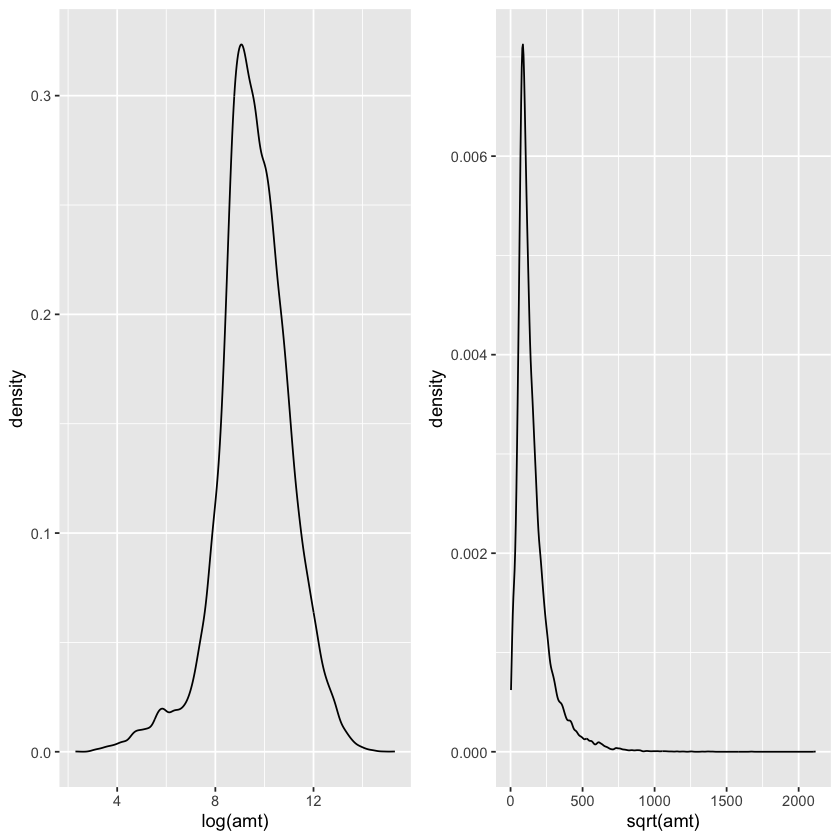

In [ ]:
# Variation from histograms - density plots

p1 <- ggplot(persinj, aes(x = log(amt))) + 
    geom_density()

p2 <- ggplot(persinj, aes(x = sqrt(amt))) + 
    geom_density()

grid.arrange(p1, p2, ncol = 2)

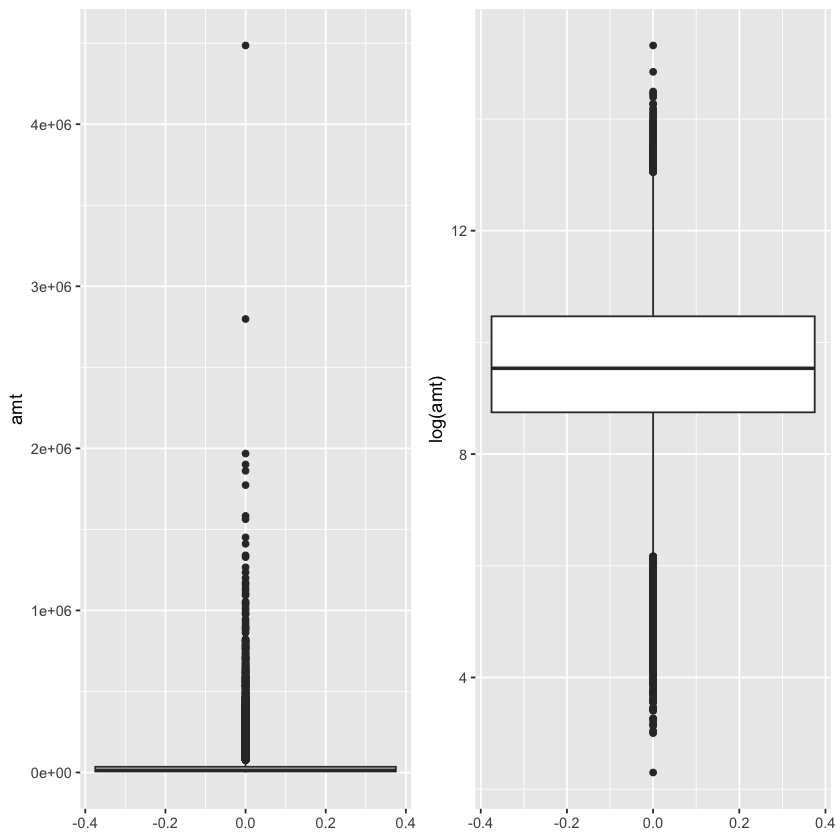

In [ ]:
# Box plots
# note we are applying aes on y instead of x

p1 <- ggplot(persinj, aes(y = amt)) + 
    geom_boxplot()

p2 <- ggplot(persinj, aes(y = log(amt))) + 
    geom_boxplot()

grid.arrange(p1, p2, ncol = 2)

[1] "Raw counts of inj"



    1     2     3     4     5     6     9 
15638  3376  1133   189   188   256  1256 

[1] "% counts of inj"



          1           2           3           4           5           6 
0.709656925 0.153203848 0.051415865 0.008576874 0.008531494 0.011617353 
          9 
0.056997640 

[1] "bar chart of inj"


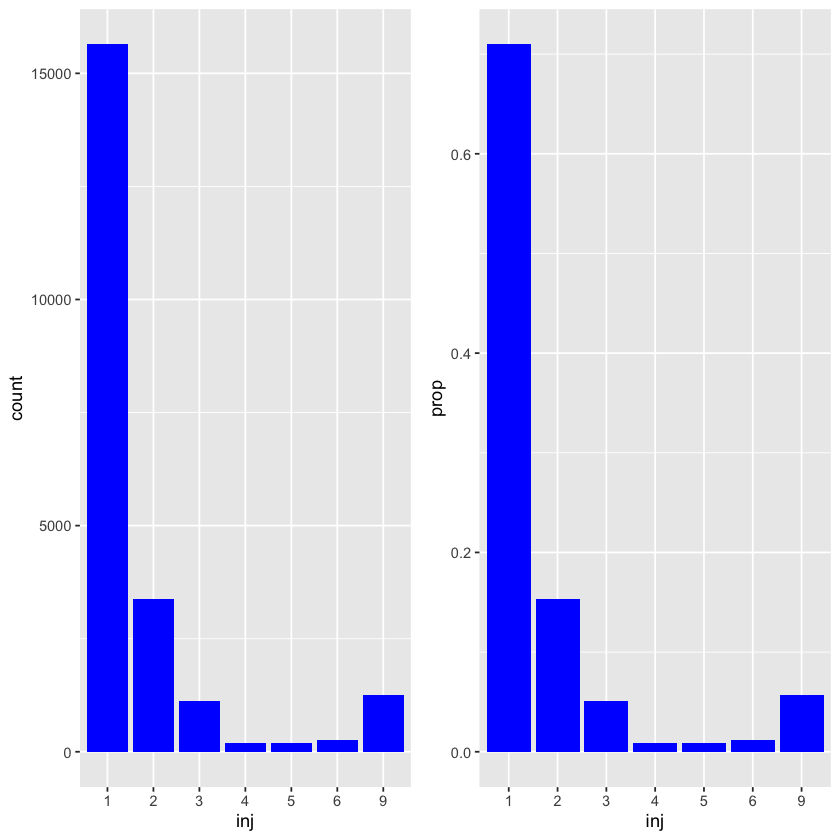

In [ ]:
# Categorical variables

print("Raw counts of inj")
table(persinj$inj)

print("% counts of inj")
table(persinj$inj)/nrow(persinj)

persinj$inj <- as.factor(persinj$inj)
persinj$legrep <- as.factor(persinj$legrep)

p1 <- ggplot(persinj, aes(x = inj)) + 
    geom_bar(fill = "blue")

p2 <- ggplot(persinj, aes(x = inj)) + 
    geom_bar(fill = "blue", aes(y = after_stat(prop), group = 1))

print("bar chart of inj")
grid.arrange(p1, p2, ncol = 2)

[1] "Table presentation"


inj,count
<fct>,<int>
1,15638
2,3376
3,1133
4,189
5,188
6,256
9,1256


[1] "Count bar chart"


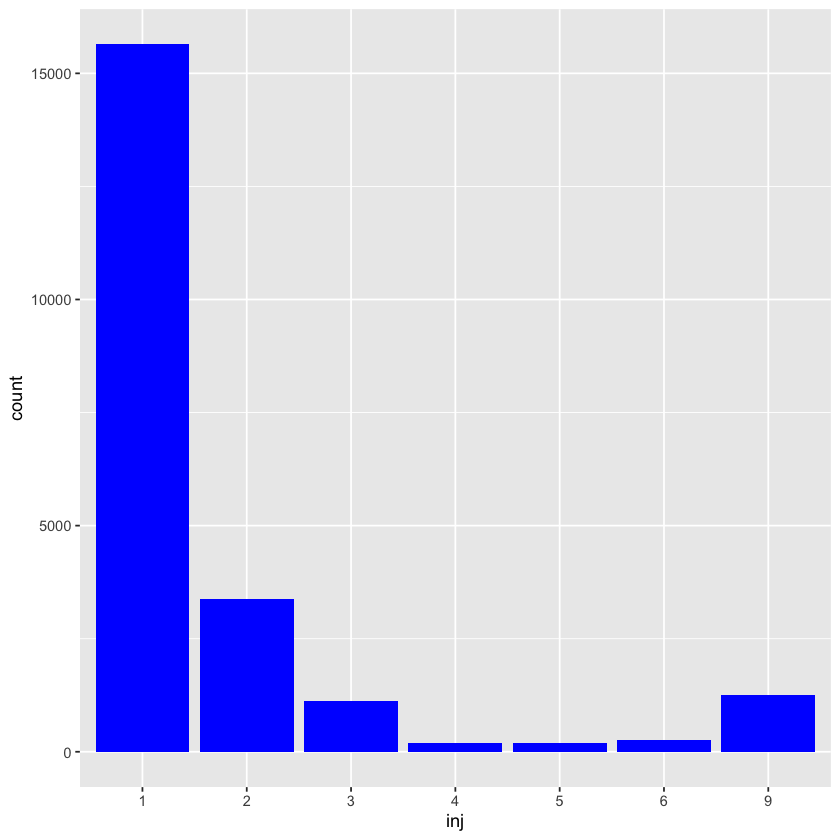

In [ ]:
# Case 2 - given summarized data
library(tidyverse)

persinj_by_inj <- persinj %>%
    group_by(inj) %>%
    summarize(count = n())

print("Table presentation")
persinj_by_inj

print("Count bar chart")
ggplot(persinj_by_inj, aes(x  = inj, y = count)) + 
    geom_col(fill = "blue")


[1] "correlations"


[1] 0.3466114

[1] 0.6070667

[1] "Grid arrangement of bivariate relationship"


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


[1] "color code by legrep"


`geom_smooth()` using formula = 'y ~ x'


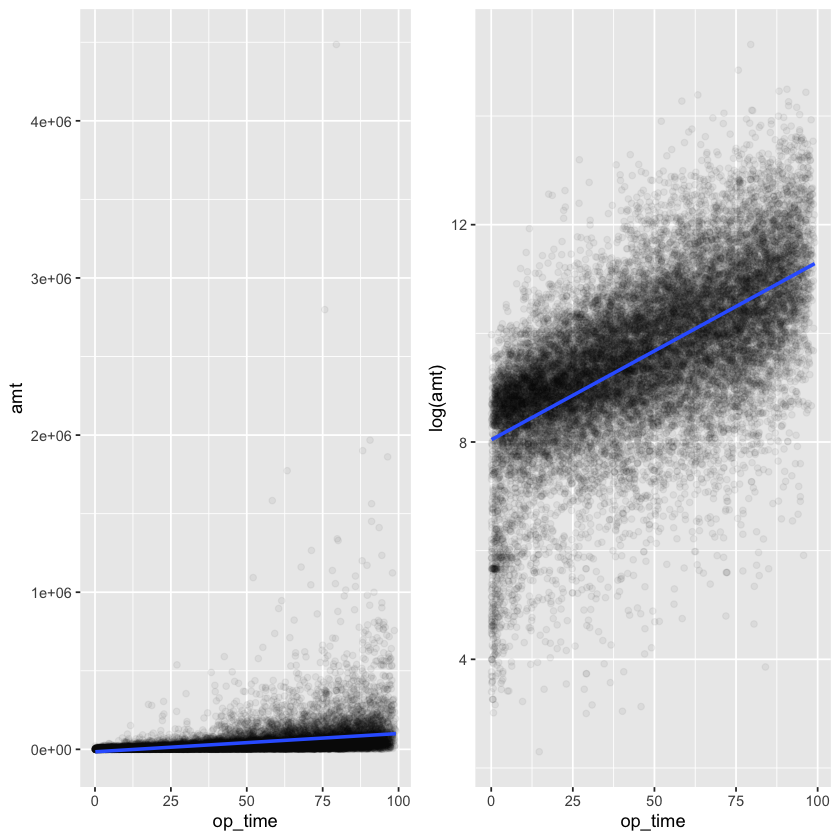

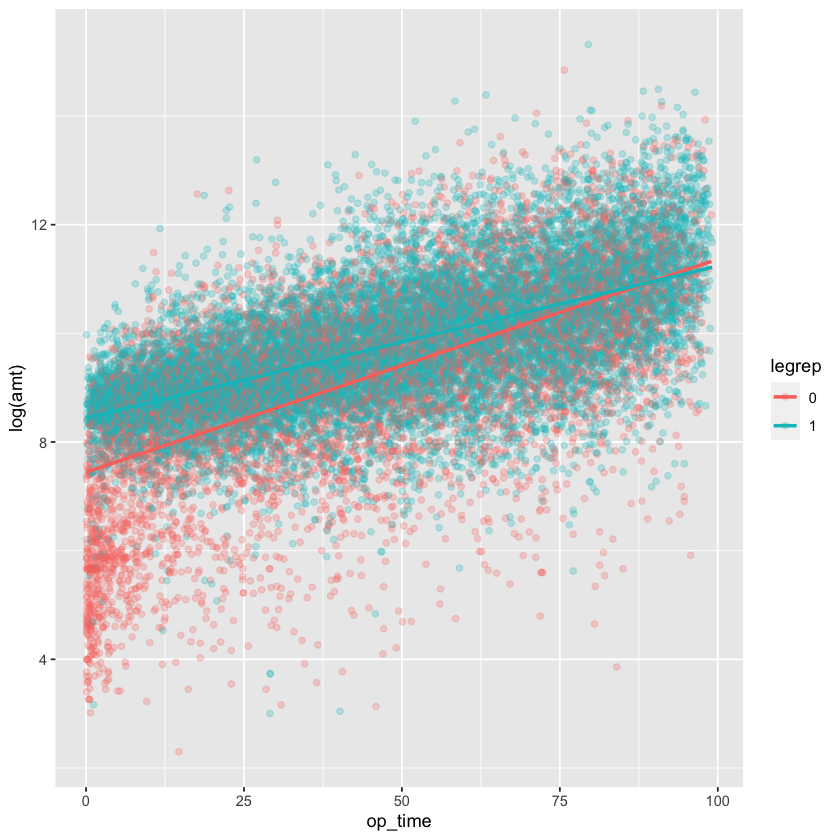

In [ ]:
# bivariate data exploration
# numeric vs numeric

print("correlations")
cor(persinj$amt, persinj$op_time)
cor(log(persinj$amt), persinj$op_time)

p1 <- ggplot(persinj, aes(x = op_time, y = amt)) + 
    geom_point(alpha = 0.05) + 
    geom_smooth(method = "lm", se = FALSE)
p2 <- ggplot(persinj, aes(x = op_time, y = log(amt))) + 
    geom_point(alpha = 0.05) + 
    geom_smooth(method = "lm", se = FALSE)

print("Grid arrangement of bivariate relationship")
grid.arrange(p1, p2, ncol = 2)

# now we can try to determine if a third variable has any influence
print("color code by legrep")
ggplot(persinj, aes(x = op_time, y = log(amt), color = legrep)) + 
    geom_point(alpha = 0.25) + geom_smooth(method = "lm", se = FALSE)

In [ ]:
# bivariate - numeric vs categorical
library(tidyverse)
persinj %>%
    group_by(inj) %>%
    summarize(
        mean = mean(log(amt)),
        median = median(log(amt)),
        n = n()
    )

inj,mean,median,n
<fct>,<dbl>,<dbl>,<int>
1,9.368095,9.360187,15638
2,10.322195,10.331269,3376
3,10.728880,10.912107,1133
4,11.045453,11.225721,189
5,10.760397,10.553701,188
6,9.681230,9.073568,256
9,8.354676,8.571524,1256


In [ ]:
persinj %>%
    group_by(legrep) %>%
    summarize(
        mean = mean(log(amt)),
        median = median(log(amt)),
        n = n()
    )

legrep,mean,median,n
<fct>,<dbl>,<dbl>,<int>
0,9.178642,9.320435,8008
1,9.772004,9.636173,14028


[1] "Arranging as 2 separate boxplots"
[1] "combine information into one display"


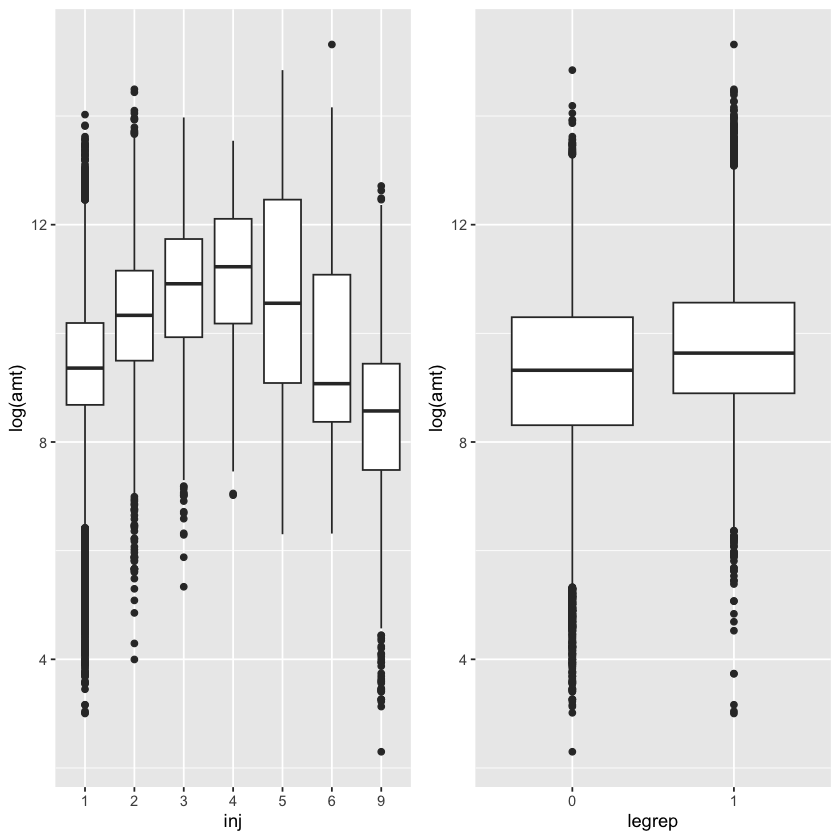

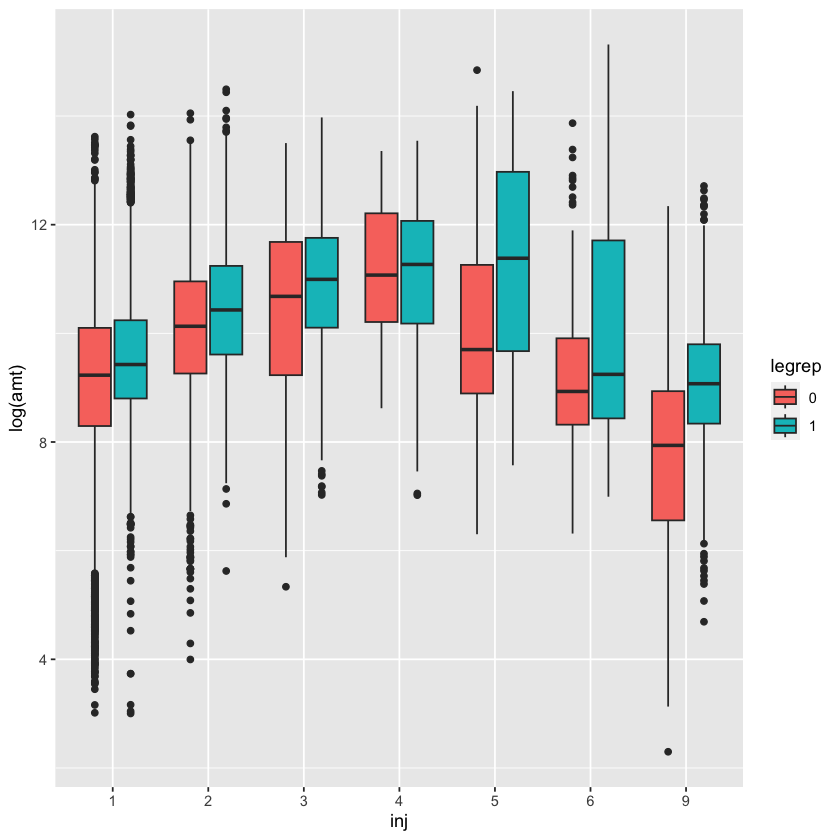

In [ ]:
# graphical display of the above
p1 <- ggplot(persinj, aes(x = inj, y = log(amt))) + geom_boxplot()
p2 <- ggplot(persinj, aes(x = legrep, y = log(amt))) + geom_boxplot()

print("Arranging as 2 separate boxplots")
grid.arrange(p1, p2, ncol = 2)

# we can combine this information
print("combine information into one display")
ggplot(persinj, aes(x = inj, y = log(amt), fill = legrep)) + geom_boxplot()

In [ ]:
# bivariate: categorical vs categorical
table(persinj$legrep, persinj$inj)

   
        1     2     3     4     5     6     9
  0  5571  1152   374    56    85   121   649
  1 10067  2224   759   133   103   135   607

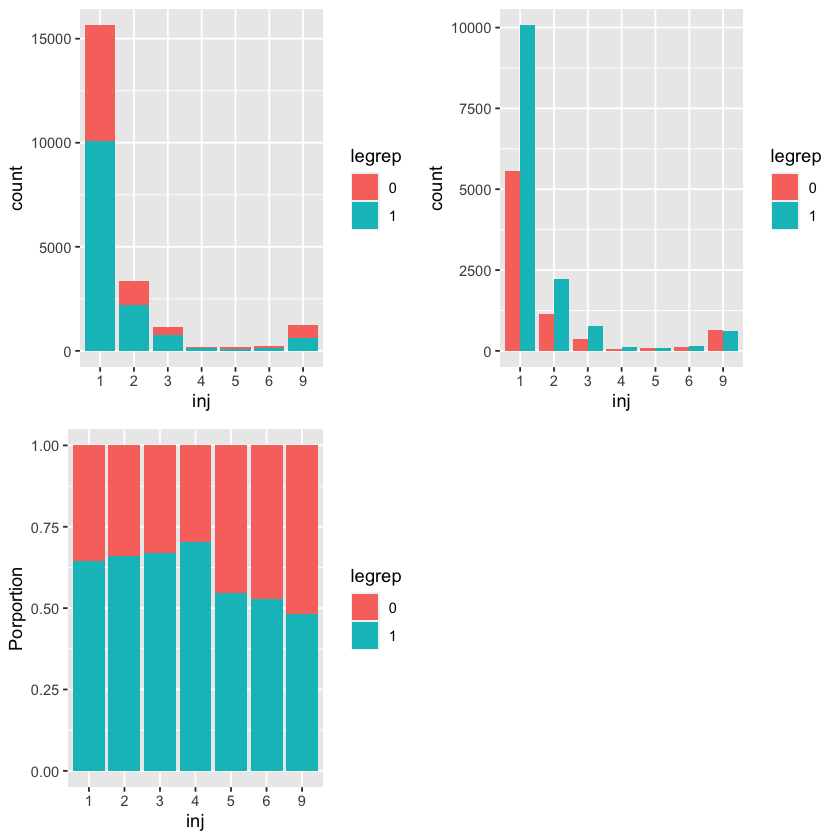

In [ ]:
# graphical displays of categorical vs categorical data
# p1 is stacked - default view shows proportion breakdown
# p2 is dodged - shows counts separated by legrep side by side comparison
# p3 is filled - shows relative proportions (not counts)
p1 <- ggplot(persinj, aes(x = inj, fill = legrep)) + geom_bar()
p2 <- ggplot(persinj, aes(x = inj, fill = legrep)) + geom_bar(position = "dodge")
p3 <- ggplot(persinj, aes(x = inj, fill = legrep)) + geom_bar(position = "fill") + ylab("Porportion")
grid.arrange(p1, p2, p3, ncol = 2)